# MLP Regression: Sine Data Set 

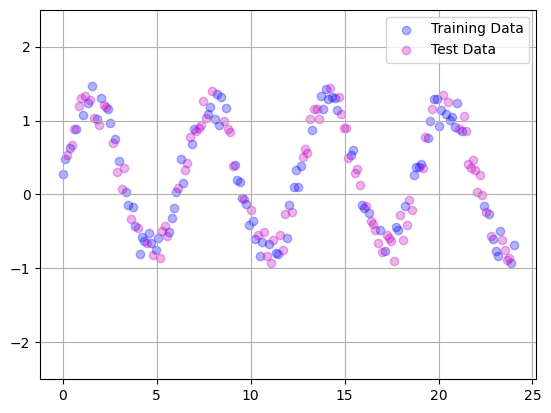

In [1]:
import numpy as np
from time import time
from scipy.stats import loguniform, randint
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Generate the Sine Data Set
np.random.seed(0)
x = np.linspace(0,24,200).reshape(-1,1)
y = np.sin(x) + 0.5*np.random.rand(x.size,1)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

def plotData(X_train,X_test,y_train,y_test):
    plt.scatter(X_train,y_train,color='b',alpha=0.3,label='Training Data')
    plt.scatter(X_test,y_test,color='m',alpha=0.3,label='Test Data')
    plt.ylim([-2.5, 2.5])
    plt.grid()
    
plotData(X_train, X_test, y_train, y_test)
plt.legend()
plt.show()

In [2]:
pipeline = Pipeline(
    steps=[("preprocess", StandardScaler()),
           ("regress", MLPRegressor(max_iter=5000))]
)

model_params = {'regress__alpha': loguniform(1e-4, 10),
                'regress__solver': ['sgd','adam'],
                'regress__hidden_layer_sizes': 
                    [(i, j, k) for i in range(10, 51) for j in range(10, i+1) for k in range(10, j+1)],
                'regress__activation': ['identity','logistic','tanh','relu']}

n_iter = 30
random_search = RandomizedSearchCV(pipeline,
                                   param_distributions=model_params, 
                                   n_iter=n_iter, verbose=2)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
        % ((time() - start), n_iter))

# Print best parameters after tuning
print(random_search.best_params_)
  
# Print how our model looks after hyper-parameter tuning
print(random_search.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END regress__activation=tanh, regress__alpha=2.541106171836163, regress__hidden_layer_sizes=(46, 44, 31), regress__solver=adam; total time=   0.7s
[CV] END regress__activation=tanh, regress__alpha=2.541106171836163, regress__hidden_layer_sizes=(46, 44, 31), regress__solver=adam; total time=   0.8s
[CV] END regress__activation=tanh, regress__alpha=2.541106171836163, regress__hidden_layer_sizes=(46, 44, 31), regress__solver=adam; total time=   1.0s
[CV] END regress__activation=tanh, regress__alpha=2.541106171836163, regress__hidden_layer_sizes=(46, 44, 31), regress__solver=adam; total time=   0.9s
[CV] END regress__activation=tanh, regress__alpha=2.541106171836163, regress__hidden_layer_sizes=(46, 44, 31), regress__solver=adam; total time=   0.7s
[CV] END regress__activation=relu, regress__alpha=0.0007907121056225574, regress__hidden_layer_sizes=(42, 32, 10), regress__solver=sgd; total time=   0.1s
[CV] END regress__activ

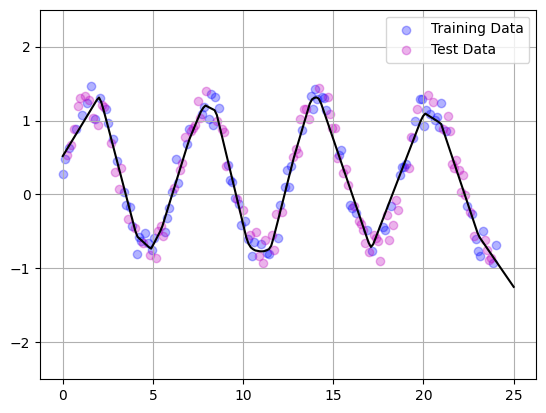

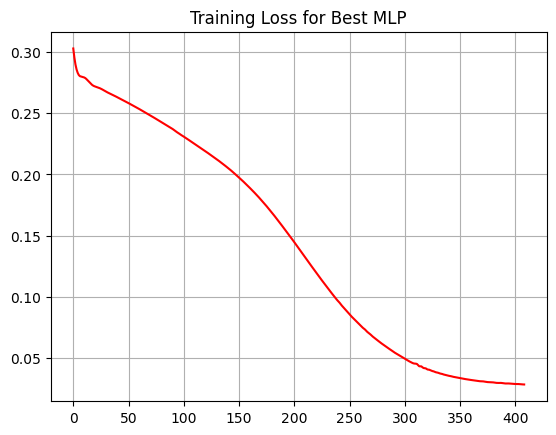

In [4]:
X_all = np.linspace(0,25,200).reshape(-1,1)
y_pred = random_search.predict(X_all)
plotData(X_train, X_test, y_train, y_test)
plt.legend()
plt.plot(X_all,y_pred,'k')
plt.show()

loss_values = random_search.best_estimator_[1].loss_curve_
plt.plot(loss_values,'r')
plt.title('Training Loss for Best MLP')
plt.grid()
#print(np.vstack((random_search.predict(X_train),y_test)).T)

In this example, three hidden layers were used in the MLP Regressor in order to fit the sine data set. In the hyper-parameter distributions, the number of hidden neurons were set to decrease at each succeeding layer. Try different number of layers and search ranges to see if Random Search can find a good architecture. 